# 1 Importing Neccesary libraries

In [70]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
from keras.applications import xception
from keras.preprocessing import image
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import cv2
from os import listdir,makedirs
from os.path import isfile,join

In [6]:
!pwd

/home/jovyan/work/WhaleChallene


# 2 Preparing necessary data

In [8]:
train_df = pd.read_csv('/home/jovyan/work/WhaleChallene/train.csv')

In [10]:
train_df.columns

Index(['Image', 'Id'], dtype='object')

In [12]:
train_df.head(10)

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3
5,0025e8c2.jpg,w_8b1ca89
6,0026a8ab.jpg,w_eaad6a8
7,0031c258.jpg,new_whale
8,0035632e.jpg,w_3d0bc7a
9,0037e7d3.jpg,w_50db782


In [18]:
len(train_df)

9850

In [16]:
Labels_Id = train_df['Id'].unique()

In [17]:
len(Labels_Id)

4251

So for 4251 categories have 9850 pics , so we need to add more data to it  But before that I will print number of images each category have

In [19]:
Labels_counts = df['Id'].value_counts()

In [24]:
print("I am verifying unique images again and they are  " + str(len(Labels_counts)))
Labels_counts

I am verifying unique images again and they are  4251


new_whale    810
w_1287fbc     34
w_98baff9     27
w_7554f44     26
w_1eafe46     23
w_fd1cb9d     22
w_693c9ee     22
w_ab4cae2     22
w_73d5489     21
w_43be268     21
w_987a36f     21
w_f19faeb     20
w_9b401eb     19
w_95874a5     19
w_c0d494d     18
w_b7d5069     18
w_18eee6e     17
w_eb0a6ed     17
w_0e737d0     17
w_dbda0d6     17
w_a59905f     16
w_67de30b     16
w_17ee910     16
w_6c803bf     16
w_b0e05b1     16
w_ee17a08     15
w_cae7677     15
w_89e159a     15
w_9ca943b     15
w_b074cdf     14
            ... 
w_126653d      1
w_e58fbe3      1
w_80c5f01      1
w_42aa161      1
w_42ab867      1
w_22b09d0      1
w_49a7077      1
w_0be0d81      1
w_2641733      1
w_898eb3b      1
w_164cfff      1
w_2a32d3d      1
w_e9592d4      1
w_49a3a96      1
w_4b8d0c9      1
w_5f8c5d3      1
w_85cdd9b      1
w_4f94f26      1
w_35c5d43      1
w_482d9d6      1
w_0dbfc31      1
w_8cc9b05      1
w_9927328      1
w_0824736      1
w_d95069e      1
w_92ed15f      1
w_773967d      1
w_e613f12     

We can observe that some id's have only one picture for training , so we need to use Data Augumentation technique 
to increase training samples

In [32]:
img1 = mpimg.imread('/home/jovyan/work/WhaleChallene/train/6675d9eb.jpg')

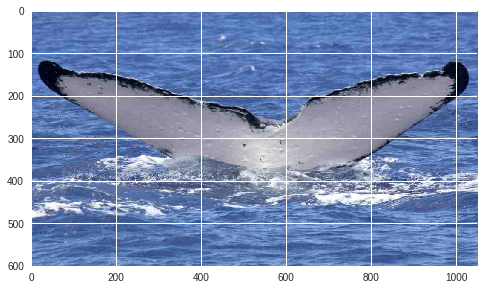

In [34]:
plt.imshow(img1)
plt.show()

In [35]:
print(img1.shape)

(600, 1050, 3)


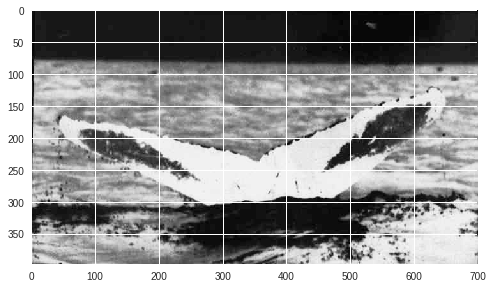

(398, 700)


In [40]:
img2 = mpimg.imread('/home/jovyan/work/WhaleChallene/train/0014cfdf.jpg')
plt.imshow(img2)
plt.show()
print(img2.shape)

## 2.1 Converting Colour images to gray scale images
From above we can see that there are both RGB and Grey type of images in same folder,
So I am moving all grey images to another folder(train_gray) and  convert rgb images 
to gray images and move to train_gray folder using open_cv

In [41]:
!ls

Input_data_zip files  sample_submission.csv  train
main_notebook.ipynb   test		     train.csv


In [42]:
#!mkdir train_gray

In [71]:
!pwd

/home/jovyan/work/WhaleChallene


In [67]:
!ls train

00022e1a.jpg  33601fbc.jpg  675f9894.jpg  99b6e425.jpg	cc820eae.jpg
000466c4.jpg  336ade90.jpg  67622472.jpg  99c7570d.jpg	cc87cb0b.jpg
00087b01.jpg  336cf135.jpg  676935be.jpg  99c8948b.jpg	cc8eb5e2.jpg
001296d5.jpg  336f46ad.jpg  676d3681.jpg  99caa8ec.jpg	cc93d2f1.jpg
0014cfdf.jpg  3375722d.jpg  67758056.jpg  99cd3141.jpg	cc95eb5d.jpg
0025e8c2.jpg  3385ff66.jpg  677a1285.jpg  99ce339f.jpg	cc965a42.jpg
0026a8ab.jpg  338b0add.jpg  677c2196.jpg  99d708ca.jpg	cc979ad0.jpg
0031c258.jpg  33bdda74.jpg  6780a263.jpg  99e6f6a0.jpg	cc988a57.jpg
0035632e.jpg  33c25291.jpg  678fad91.jpg  99f9cdcf.jpg	cc9d5dac.jpg
0037e7d3.jpg  33c7a0ee.jpg  67b30544.jpg  9a0ed01d.jpg	cca06b1e.jpg
00389cd7.jpg  33cdc2a8.jpg  67c185bc.jpg  9a3b5779.jpg	cca9cd4e.jpg
0042dcc4.jpg  33db4a84.jpg  67c96540.jpg  9a3e3226.jpg	ccb8c993.jpg
0042ea34.jpg  33dd87cf.jpg  67ce9238.jpg  9a5c2cfd.jpg	ccc570bb.jpg
00467ae9.jpg  33e02767.jpg  67d13532.jpg  9a5e9be0.jpg	ccc9abf7.jpg
004a97f3.jpg  33e06290.jpg  67d226df.jpg  9a8275

32ba6c15.jpg  6687a458.jpg  983d31f6.jpg  cb7f7d57.jpg	ff0df395.jpg
32c16e81.jpg  669745ef.jpg  984ab8c6.jpg  cb800788.jpg	ff24f0ea.jpg
32c6ae5b.jpg  6699001e.jpg  9855e275.jpg  cb8f2b0c.jpg	ff2760bb.jpg
32c91871.jpg  669d5af7.jpg  985c9b9a.jpg  cb8f5fc6.jpg	ff2965ba.jpg
32d9e0da.jpg  669fc7cf.jpg  986ac34b.jpg  cb93a0b0.jpg	ff2c20cc.jpg
32e072ff.jpg  66a4f9b9.jpg  98746ad3.jpg  cba2812e.jpg	ff2d0d82.jpg
32e98a6f.jpg  66a597cf.jpg  98762788.jpg  cba74978.jpg	ff3509c0.jpg
32ed5989.jpg  66a98b8b.jpg  988eed9e.jpg  cba81909.jpg	ff38054f.jpg
32eec8a0.jpg  66aa7bee.jpg  98940415.jpg  cbae4e2c.jpg	ff3c2c25.jpg
32f027c4.jpg  66bc6504.jpg  989846a8.jpg  cbb03621.jpg	ff3f151f.jpg
32f39c22.jpg  66c3cb0f.jpg  98a832ad.jpg  cbb60396.jpg	ff421460.jpg
32fce9b5.jpg  66c598a7.jpg  98af46fe.jpg  cbc0606f.jpg	ff4bb3a4.jpg
32fec493.jpg  66c875ce.jpg  98b1bb3a.jpg  cbc40e82.jpg	ff5a5ed4.jpg
33023e3f.jpg  66cb1bde.jpg  98b83b4d.jpg  cbcb418d.jpg	ff6946b4.jpg
330794d8.jpg  66e24bcb.jpg  98bc48a7.jpg  cbd646

In [76]:
file_count_train = sum(len(files) for _, _, files in os.walk(r'/home/jovyan/work/WhaleChallene/train'))
print(file_count_train)

9850


### My doubt is I coverted from BGR to gray , but is it okay to covert it from rgb to gray

In [72]:
path = r'/home/jovyan/work/WhaleChallene/train' # Source Folder
dstpath = r'/home/jovyan/work/WhaleChallene/train_gray' # Destination Folder

try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = [f for f in listdir(path) if isfile(join(path,f))] 

for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,gray)
    except:
        print ("{} is not converted".format(image))

Directory already exist, images will be written in asme folder


In [75]:
!ls train_gray

00022e1a.jpg  33601fbc.jpg  675f9894.jpg  99b6e425.jpg	cc820eae.jpg
000466c4.jpg  336ade90.jpg  67622472.jpg  99c7570d.jpg	cc87cb0b.jpg
00087b01.jpg  336cf135.jpg  676935be.jpg  99c8948b.jpg	cc8eb5e2.jpg
001296d5.jpg  336f46ad.jpg  676d3681.jpg  99caa8ec.jpg	cc93d2f1.jpg
0014cfdf.jpg  3375722d.jpg  67758056.jpg  99cd3141.jpg	cc95eb5d.jpg
0025e8c2.jpg  3385ff66.jpg  677a1285.jpg  99ce339f.jpg	cc965a42.jpg
0026a8ab.jpg  338b0add.jpg  677c2196.jpg  99d708ca.jpg	cc979ad0.jpg
0031c258.jpg  33bdda74.jpg  6780a263.jpg  99e6f6a0.jpg	cc988a57.jpg
0035632e.jpg  33c25291.jpg  678fad91.jpg  99f9cdcf.jpg	cc9d5dac.jpg
0037e7d3.jpg  33c7a0ee.jpg  67b30544.jpg  9a0ed01d.jpg	cca06b1e.jpg
00389cd7.jpg  33cdc2a8.jpg  67c185bc.jpg  9a3b5779.jpg	cca9cd4e.jpg
0042dcc4.jpg  33db4a84.jpg  67c96540.jpg  9a3e3226.jpg	ccb8c993.jpg
0042ea34.jpg  33dd87cf.jpg  67ce9238.jpg  9a5c2cfd.jpg	ccc570bb.jpg
00467ae9.jpg  33e02767.jpg  67d13532.jpg  9a5e9be0.jpg	ccc9abf7.jpg
004a97f3.jpg  33e06290.jpg  67d226df.jpg  9a8275

In [77]:
file_count_train_gray = sum(len(files) for _, _, files in os.walk(r'/home/jovyan/work/WhaleChallene/train_gray'))
print(file_count_train_gray)

9850


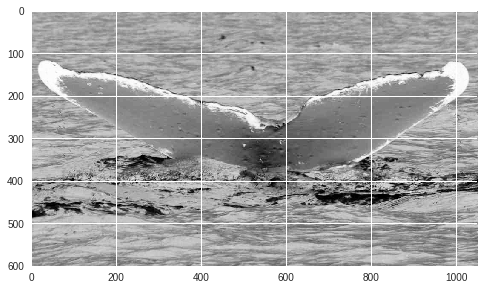

(600, 1050)


In [79]:
img3 = mpimg.imread('/home/jovyan/work/WhaleChallene/train_gray/6675d9eb.jpg')
plt.imshow(img3)
plt.show()
print(img3.shape)

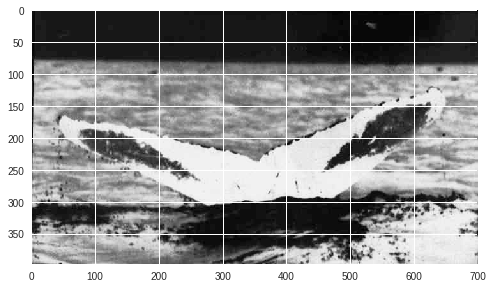

(398, 700)


In [80]:
img4 = mpimg.imread('/home/jovyan/work/WhaleChallene/train/0014cfdf.jpg')
plt.imshow(img4)
plt.show()
print(img2.shape)

## 2.2 Converting Dimensions of Image into unique dimension 
As we can see from above images , each image is of different dimension , so we need to make them into a unique dimension , so i will resize them to (128,128) dimension

In [81]:
!ls

Input_data_zip files  sample_submission.csv  train	train_gray
main_notebook.ipynb   test		     train.csv


In [82]:
#!mkdir train_gray_resized

In [83]:
!ls

Input_data_zip files  sample_submission.csv  train	train_gray
main_notebook.ipynb   test		     train.csv	train_gray_resized


In [ ]:
import numpy as np #Math lib
import cv2 #Image manipulation lib
import os #Os commands

if not os.path.exists('small'): #Does the folder "small" exists ?
   os.makedirs('small') #If not, create it
pic_num=1   #Initialize var pic_num with value 1

for i in ['test']: #For every element of this list (containing 'test' only atm)

 try: #Try to
  if os.path.exists(str(pic_num)+'.jpg'): #If the image pic_num (= 1 at first) exists
      print(i) #Prints 'test' (because it's only element of the list)
      #Initialize var img with image content (opened with lib cv2)
      img=cv2.imread(str(pic_num)+'.jpg') 
      #We resize the image to dimension 100x100 and store result in var resized_image
      resized_image=cv2.resize(img,(100,100)) 
      #Save the result on disk in the "small" folder
      cv2.imwrite("small/"+str(pic_num)+'.jpg',resized_image)
  pic_num+=1 #Increment variable pic_num
 except Exception as e: #If there was a problem during the operation
      print(str(e)) #Prints the exception